In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
import datetime as dt
import statsmodels.formula.api as smf

In [2]:
COLOR_PALETTE = {
    'deepsky_blue': '#82c3ff',
    'dividers': '#2626264d',
    'dividers_rgb': '#262626',
    'dividers_alpha': 0.3,
    'black': '#262626',
    'bittersweet': '#ef7569',
    'golden-sand': '#fff',
    'white': 'white',
    'light-gray': '#f9f9f9',
    'dark-gray': '#aeaeae',
    'gray': '#e9e9e9',
    'blend': '#ffffff80',
    'mid-gray': '#d2d2d2',
    'evening-sea': '#004b3b',
    'deepsky-blue': '#82c3ff',
    'yellow': '#f4d06f',
    'accessible-components--dark-grey': '#9b9b9b',
    'accessible-components--dodger-blue': '#1378d1',
}

plt.rcParams['font.family'] = 'Liberation Sans'

plt.style.use({
   'axes.edgecolor': COLOR_PALETTE['dividers_rgb'],
   # 'legend.edgecolor': COLOR_PALETTE['dividers'],
   'text.color': COLOR_PALETTE['black'],
   'axes.labelcolor': COLOR_PALETTE['black'],
   'xtick.color': COLOR_PALETTE['black'],
   'ytick.color': COLOR_PALETTE['black'],
   'grid.color': COLOR_PALETTE['dividers_rgb'],
   'grid.alpha': COLOR_PALETTE['dividers_alpha'],
})

In [3]:
# Herculano-Houzel et al. 2015, 10.1159/000437413
nneurons = [{'species':'Caenorhabditis elegans', 'name':'C. elegans',
             'nneurons_low':302, 'nneurons_high':302},
            {'species': 'Danio rerio (larvae)', 'name': 'Zebrafish (larva)',  # https://elifesciences.org/articles/28158
             'nneurons_low': 100000, 'nneurons_high': 100000},
            # {'species': '?', 'name': 'Fruitfly',  # https://elifesciences.org/articles/28158
            #  'nneurons_low': 140000, 'nneurons_high': 140000},
            # {'species':'Drosophila melanogaster', 'name':'Drosophila', # https://doi.org/10.1016/j.cub.2010.11.056
            #  'nneurons_low':135000, 'nneurons_high':135000},
            # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3597383/
            {'species':'Mus musculus', 'name':'Mouse', # Vincent et al 2010: 7.5x10^7
             'nneurons_low':67873741-10406194, 'nneurons_high':67873741+10406194},
            # {'species':'Rattus norvegicus', 'name':'Rat',
            #  'nneurons_low':188867832-12622383, 'nneurons_high':188867832+12622383},
            {'species': 'Macaca mulatta', 'name': 'Macaque',
             'nneurons_low': 6376160000, 'nneurons_high': 6376160000},
            {'species': 'Homo sapiens', 'name': 'Human',
             'nneurons_low': 86060000000-8120000000, 'nneurons_high': 86060000000+8120000000},
            ]

In [4]:
def plot_species_neurons_hlines(xmin, xmax, xlabel):
    for entry in nneurons:
        avg_neurons = (entry['nneurons_low'] + entry['nneurons_high']) / 2
        plt.hlines(
            y=[avg_neurons],
            xmin=xmin,
            xmax=xmax,
            colors='gray',
            ls=':',
        )
        plt.text(
            xlabel, 
            avg_neurons, 
            entry['name'],
            va='bottom',
            # fontsize=7,
            color='gray',
        )

# Figure 1: Number of neurons in simulations

In [5]:
neurons_df = pd.read_csv('./data/Neuron Simulations - TASK 3 - Sheet1.csv')
neurons_df.head()

,Simulation/Initiative,Type of Simulation,Neurons,# of Neurons,Synapses,Hardware and Software,Slowdown time (required for one biological second),Timestep,Notes,Link,Category,Organism (random)
0,Enigma Project,Multi-modal neural networks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://enigmaproject.ai/,Specialized/Hybrid,Human
1,"(Schepper et al., 2022)","Integrate-and-fire point neurons, cerebellar n...",29230 neurons,29230.0,"1.5 million chemical synapses, 2100 electrical...",NEURON simulation environment,NaN,NaN,NaN,https://www.nature.com/articles/s42003-022-042...,Integrate-and-Fire,Other
2,"(Shiu et al., 2024)",Leaky integrate-and-fire,"125,000",125000.0,50 million,Spiking Neural Network Simulator Brian2,NaN,NaN,NaN,https://www.nature.com/articles/s41586-024-077...,Integrate-and-Fire,Human
3,(Simeon et al. 2024),Varying neural network architecture for proces...,300,300.0,NaN,Pytorch Deep Learning Framework,NaN,NaN,NaN,https://www.biorxiv.org/content/biorxiv/early/...,Simple Abstract,C. elegans
4,"(Romani et al., 2024)",Electrical features (e-features) which were us...,456380,456380.0,821 million,Electrophysiological Feature Extraction Librar...,NaN,NaN,NaN,https://www.biorxiv.org/content/10.1101/2023.0...,Detailed Biophysical,Mouse


In [6]:
# Extract year from initiaive column 
# for now: use first 4-digit number. some have multiple publications with different years
neurons_df['Year'] = neurons_df['Simulation/Initiative'].str.extract(r'(\d{4})').apply(pd.to_datetime)

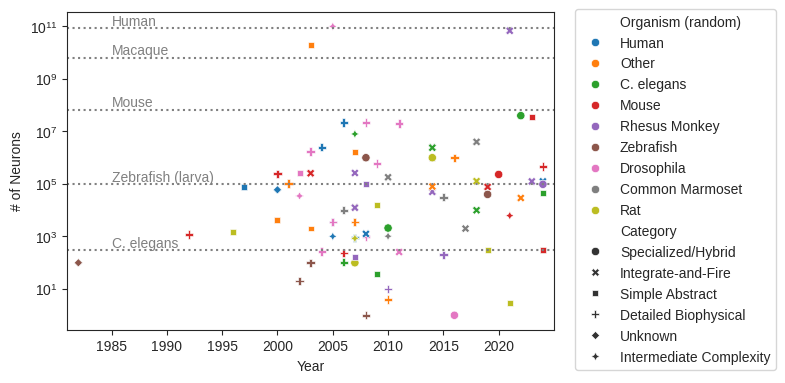

In [49]:
min_year = neurons_df['Year'].min() - dt.timedelta(days=365)
max_year = neurons_df['Year'].max() + dt.timedelta(days=365)
label_year = dt.datetime(year=1985, month=1, day=1)

plt.figure(figsize=(8, 4))
sns.scatterplot(neurons_df, x='Year', y='# of Neurons', style='Category', hue='Organism (random)')
plot_species_neurons_hlines(min_year, max_year, label_year)
plt.legend(bbox_to_anchor=(1.03,1.03))
plt.yscale('log')
plt.xlim(min_year, max_year)
plt.tight_layout()
plt.savefig('second-drafts/num-neurons.svg')
plt.savefig('fourth-drafts/previous/num-neurons.svg')

# Figure 2: Imaging speed

![imaging-speed-figure](./figures-to-replicate/imaging-speed.png)

In [8]:
imaging_speed_df = pd.read_excel(
    './data/cboschp-wtlandscape_mbc-ca8b379/0-data/maps_dates_230119.xlsx',
    skiprows=[1],
    parse_dates=['released_year'],
)
imaging_speed_df

,mapName,mapID,released_year,map_comment,doi,img_tech,n_machines_involved,n_machines_parallel,species,dev,...,fov_mm3,vx_x_nm,vx_y_nm,vx_z_nm,vx_avg_nm,dsSize_nVx,dsSize_TB,DT,imagingRate,imagingRate_perMachine
0,mouseRetina,E2198,2011-01-01,Briggman 2011,https://doi.org/10.1038/nature09818,SBF - SEM,1,1,mouse,adult,...,0.006300,16.50,16.50,23.0,18.431694,1006108515990,1.006109,1.9,0.526316,0.526316
1,mouseRetina,E2198,2014-01-01,Kim 2014,doi:/10.1038/nature13240,SBF - SEM,1,1,mouse,adult,...,0.006300,16.50,16.50,23.0,18.431694,1006108515990,1.006109,1.9,0.526316,0.526316
2,rabbitRetina,E1088,2011-01-01,Helmstaedter 2011,doi:10.1038/nn.2868,SBF - SEM,1,1,rabbit,adult,...,0.000105,22.00,22.00,30.0,24.396201,7252066116,0.007252,8,0.125,0.125
3,mouseRetina,E2006,2011-01-01,Helmstaedter 2011,doi:10.1038/nn.2868,SBF - SEM,1,1,mouse,adult,...,0.001264,16.50,16.50,25.0,18.951167,185652892562,0.185653,6,0.166667,0.166667
4,mouseRetina,k0563 (also referred to as ek563),2011-01-01,Helmstaedter 2011,doi:10.1038/nn.2868,SBF - SEM,1,1,mouse,adult,...,0.001196,12.00,12.00,25.0,15.326189,332291666667,0.332292,5,0.2,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,platynereis_eye,--,2014-01-01,Randel 2014,doi:10.7554/eLife.02730,ss - TEM,1,1,platynereis,larva,...,0.001568,3.72,3.72,40.0,8.210734,2832697421667,2.832697,undisclosed,undisclosed,undisclosed
62,zebrafinch_cortex,--,2017-01-01,Kornfeld 2017,doi:10.7554/eLife.24364,SBF - SEM,1,1,zebrafinsh,adult,...,0.002122,11.00,11.00,29.0,15.195948,604677115987,0.604677,0.47,2.12766,2.12766
63,zebrafinch_bs,j0126,2018-01-01,Dorkenwald 2018,doi:10.1038/nmeth.4206,SBF - SEM,1,1,zebrafinsh,adult,...,0.001076,9.00,9.00,20.0,11.744603,664390493827,0.664390,undisclosed,undisclosed,undisclosed
64,zebrafish_larva,--,2022-01-01,Svara 2022,https://doi.org/10.1038/s41592-022-01621-0,SBF - SEM,1,1,zebrafish,larva,...,0.057961,14.00,14.00,25.0,16.984993,11828694489796,11.828694,0.482082,2.074336,2.074336


In [9]:
imaging_speed_df.columns

Index(['mapName', 'mapID', 'released_year', 'map_comment', 'doi', 'img_tech',
       'n_machines_involved', 'n_machines_parallel', 'species', 'dev', 'organ',
       'region', 'fov_x_um', 'fov_y_um', 'fov_z_um', 'fov_mm3', 'vx_x_nm',
       'vx_y_nm', 'vx_z_nm', 'vx_avg_nm', 'dsSize_nVx', 'dsSize_TB', 'DT',
       'imagingRate', 'imagingRate_perMachine'],
      dtype='object')

In [10]:
imaging_speed_df['imagingRate_perMachine'] = pd.to_numeric(imaging_speed_df['imagingRate_perMachine'], errors='coerce')

In [11]:
min_date = dt.date(year=1980, month=1, day=1)
max_date = dt.date(year=2024, month=1, day=1)

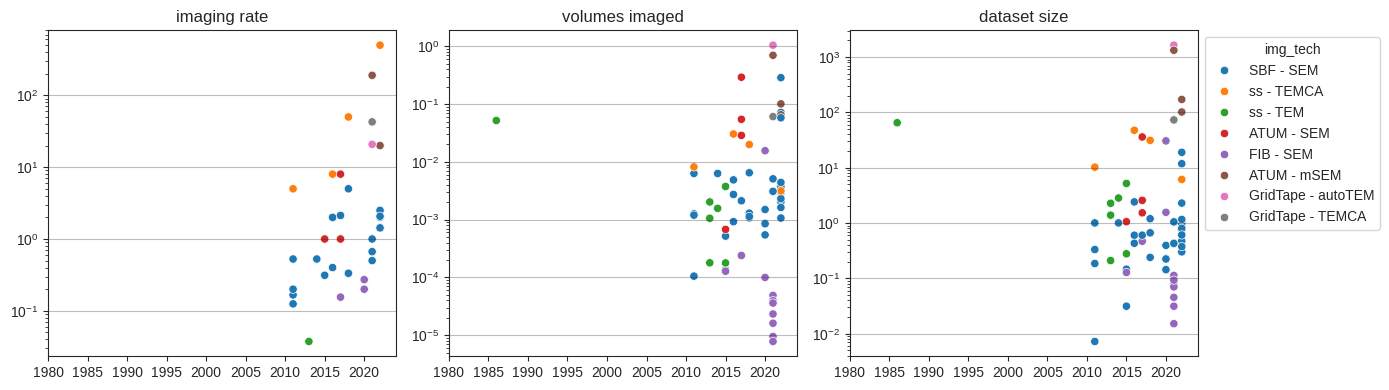

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Subplot 1: imaging rate
sns.scatterplot(
    data=imaging_speed_df, 
    x='released_year', 
    y='imagingRate_perMachine',
    hue='img_tech',
    ax=axes[0],
    legend=False,
)
axes[0].set_yscale('log')
axes[0].set_title('imaging rate')
axes[0].set_xlim(min_date, max_date)
axes[0].set_xlabel(None)
axes[0].set_ylabel(None)
axes[0].grid(axis='y')

# Subplot 2: volumes image
sns.scatterplot(
    data=imaging_speed_df, 
    x='released_year', 
    y='fov_mm3',
    hue='img_tech',
    ax=axes[1],
    legend=False,
)
axes[1].set_yscale('log')
axes[1].set_title('volumes imaged')
axes[1].set_xlim(min_date, max_date)
axes[1].set_xlabel(None)
axes[1].set_ylabel(None)
axes[1].grid(axis='y')

# Subplot 3: dataset size
sns.scatterplot(
    data=imaging_speed_df, 
    x='released_year', 
    y='dsSize_TB',
    hue='img_tech',
    ax=axes[2],
    legend=True,
)
axes[2].set_yscale('log')
axes[2].set_title('dataset size')
sns.move_legend(axes[2], "upper left", bbox_to_anchor=(1, 1))
axes[2].set_xlim(min_date, max_date)
axes[2].set_xlabel(None)
axes[2].set_ylabel(None)
axes[2].grid(axis='y')

plt.tight_layout()
plt.savefig('second-drafts/imaging-speed.svg')
plt.savefig('fourth-drafts/previous/imaging-speed.svg')

# Figure 3: compute

In [13]:
compute_df = pd.read_csv(
    './data/ai-compute/artificial-intelligence-training-computation.csv',
    parse_dates=['Day']
)
compute_df

,Entity,Code,Day,Training computation (petaFLOP),Domain
0,(ensemble): AWD-LSTM-DOC (fin) × 5 (WT2),NaN,2018-08-30,6.930000e+02,Language
1,2-layer-LSTM+Deep-Gradient-Compression,NaN,2017-12-05,1.340000e+00,Language
2,3D city reconstruction,NaN,2009-09-29,NaN,Other
3,4 layer QRNN (h=2500),NaN,2018-03-22,2.400000e+02,Language
4,6-Act Tether,NaN,2021-08-03,NaN,Other
...,...,...,...,...,...
899,mT5-XXL,NaN,2020-10-20,8.200000e+07,Language
900,top-down frozen classifier,NaN,2021-02-09,NaN,Speech
901,wave2vec 2.0 LARGE,NaN,2020-10-22,1.900000e+06,Speech
902,xTrimoPGLM -100B,NaN,2023-07-06,6.200000e+08,Biology


In [14]:
species_pf = {
    'Human': 2000.0,
    'Mouse': 10.0,
    'Fly': 0.195,
}

In [15]:
list(species_pf.items())

[('Human', 2000.0), ('Mouse', 10.0), ('Fly', 0.195)]

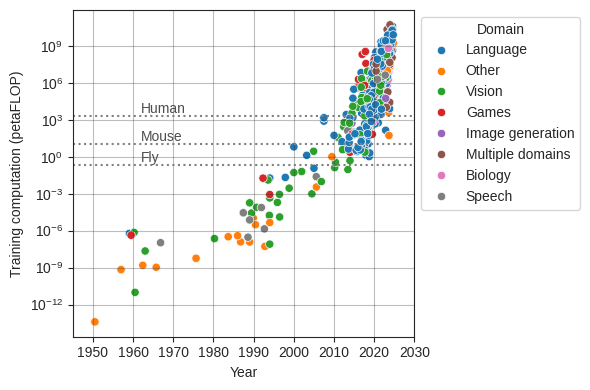

In [16]:
plt.figure(figsize=(6, 4))
ax = sns.scatterplot(
    data=compute_df, 
    x='Day', 
    y='Training computation (petaFLOP)',
    hue='Domain',
)

min_year = dt.datetime(year=1945, month=1, day=1)
max_year = dt.datetime(year=2030, month=1, day=1)
label_year = dt.datetime(year=1962, month=1, day=1)

for name, val in species_pf.items():
    plt.hlines(
        y=[val],
        xmin=min_year,
        xmax=max_year,
        colors='gray',
        ls=':',
    )
    plt.text(
        label_year, 
        val, 
        name,
        va='bottom',
        # fontsize=7,
        color='0.3',
    )

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.grid()
plt.yscale('log')
plt.xlabel('Year')
plt.xlim(min_year, max_year)
plt.tight_layout()
plt.savefig('second-drafts/compute.svg')
plt.savefig('fourth-drafts/previous/compute.svg')

# Figure 4: storage

In [17]:
storage_df = pd.read_csv(
    './data/storage-costs/historical-cost-of-computer-memory-and-storage.csv',
    parse_dates=['Year']
)
storage_df.rename(
    columns={
        'Historical price of memory': 'Memory',
        'Historical price of flash memory': 'Flash',
        'Historical price of disk drives': 'Disk',
        'Historical price of solid-state drives': 'Solid state',
    },
    inplace=True
)
storage_df.head()

,Entity,Code,Year,Memory,Flash,Disk,Solid state
0,World,OWID_WRL,1957-01-01,3.786967e+15,NaN,NaN,NaN
1,World,OWID_WRL,1959-01-01,6.032806e+14,NaN,6.747736e+10,NaN
2,World,OWID_WRL,1960-01-01,4.588051e+13,NaN,3.150364e+10,NaN
3,World,OWID_WRL,1965-01-01,2.170492e+13,NaN,NaN,NaN
4,World,OWID_WRL,1970-01-01,4.892936e+12,NaN,1.731185e+09,NaN


In [18]:
storage_dfl = pd.melt(
    storage_df, 
    ['Year'], 
    value_vars=[
        'Memory',
        'Flash',
        'Disk',
        'Solid state',
    ],
    value_name='Cost ($ / TB)',
    var_name='Storage type',
)
storage_dfl

,Year,Storage type,Cost ($ / TB)
0,1957-01-01,Memory,3.786967e+15
1,1959-01-01,Memory,6.032806e+14
2,1960-01-01,Memory,4.588051e+13
3,1965-01-01,Memory,2.170492e+13
4,1970-01-01,Memory,4.892936e+12
...,...,...,...
231,2022-01-01,Solid state,3.979603e+01
232,2023-01-01,Solid state,2.590647e+01
233,1956-01-01,Solid state,NaN
234,1964-01-01,Solid state,NaN


In [19]:
# graph presentation
species_storage_tb = {
   'Human': 6e3,
   'Mouse': 2,
   # 'Zebrafish': 1e-3,
   'Fruitfly': 2.5e-4,
   'C. elegans': 1e-3
}

species_cost = {
    k: 1e6 / v
    for k, v in species_storage_tb.items()
}

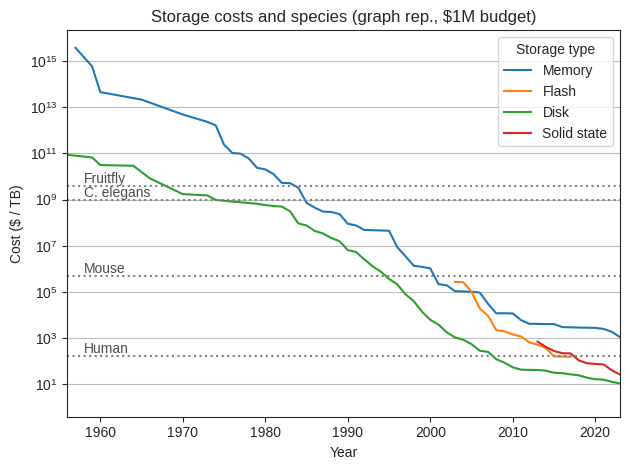

In [20]:
min_year = storage_dfl['Year'].min()
max_year = storage_dfl['Year'].max()
label_year = dt.datetime(year=1958, month=1, day=1)

ax = sns.lineplot(
    data=storage_dfl, 
    x='Year', 
    y='Cost ($ / TB)',
    hue='Storage type',
    # marker='o',
    # markersize=4,
)

# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.grid(axis='y')
plt.yscale('log')

for name, val in species_cost.items():
    plt.hlines(
        y=[val],
        xmin=min_year,
        xmax=max_year,
        colors='gray',
        ls=':',
    )
    plt.text(
        label_year, 
        val, 
        name,
        va='bottom',
        # fontsize=7,
        color='0.3',
    )

plt.xlim(min_year, max_year)
plt.title('Storage costs and species (graph rep., $1M budget)')

plt.tight_layout()
plt.savefig('second-drafts/storage-costs.svg')
plt.savefig('fourth-drafts/previous/storage-costs.svg')

# Figure 5: Neuro recordings

In [51]:
neuro_df = pd.read_csv(
    './data/Neural recordings - Neurons_year.csv',
    # parse_dates=['Year'],
)
neuro_df.head()

,Year,Month,Neurons,Authors,Method,Source,Publication,Method Note,DOI
0,1957,7,2.0,"Mountcastle, Davies, and Berman",Ephys,Stevenson,Journal of Neurophysiology,NaN,https://doi.org/10.1152/jn.1957.20.4.374
1,1957,8,2.0,Baumgarten and Schaefer,Ephys,Stevenson,Pflüger's Archiv für die gesamte Physiologie d...,NaN,https://doi.org/10.1007/BF00595651
2,1959,3,3.0,Amassian et al.,Ephys,Stevenson,Trans. of the New York Academy of Science,NaN,https://doi.org/10.1111/j.2164-0947.1959.tb016...
3,1961,1,2.0,Amassian et al.,Ephys,S&K,Annals of the New York Academy of Sciences,NaN,https://doi.org/10.1111/j.1749-6632.1961.tb201...
4,1962,1,3.0,Hubel and Wiesel,Ephys,Stevenson,Journal of Physiology,NaN,https://doi.org/10.1113/jphysiol.1962.sp006837


In [52]:
ephys_fit_model = smf.rlm('np.log(Neurons) ~ Year', data=neuro_df.query('Method == "Ephys"'))
ephys_fit_res = ephys_fit_model.fit()
print(ephys_fit_res.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:        np.log(Neurons)   No. Observations:                  163
Model:                            RLM   Df Residuals:                      161
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 24 Jan 2025                                         
Time:                        07:04:24                                         
No. Iterations:                    16                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -195.7351      8.011    -24.434      0.0

In [53]:
imag_fit_model = smf.rlm('np.log(Neurons) ~ Year', data=neuro_df.query('Method == "Imaging"'))
imag_fit_res = imag_fit_model.fit()
print(imag_fit_res.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:        np.log(Neurons)   No. Observations:                   27
Model:                            RLM   Df Residuals:                       25
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 24 Jan 2025                                         
Time:                        07:04:24                                         
No. Iterations:                    14                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -830.8574    113.333     -7.331      0.0

In [54]:
min_year = neuro_df['Year'].min()
max_year = neuro_df['Year'].max()

In [55]:
x_lin = np.linspace(min_year, max_year, 2)

In [56]:
y_lin_ephys = np.exp(ephys_fit_res.params['Intercept'] + ephys_fit_res.params['Year'] * x_lin)
y_lin_imag = np.exp(imag_fit_res.params['Intercept'] + imag_fit_res.params['Year'] * x_lin)

In [57]:
neuro_df

,Year,Month,Neurons,Authors,Method,Source,Publication,Method Note,DOI
0,1957,7,2.0,"Mountcastle, Davies, and Berman",Ephys,Stevenson,Journal of Neurophysiology,NaN,https://doi.org/10.1152/jn.1957.20.4.374
1,1957,8,2.0,Baumgarten and Schaefer,Ephys,Stevenson,Pflüger's Archiv für die gesamte Physiologie d...,NaN,https://doi.org/10.1007/BF00595651
2,1959,3,3.0,Amassian et al.,Ephys,Stevenson,Trans. of the New York Academy of Science,NaN,https://doi.org/10.1111/j.2164-0947.1959.tb016...
3,1961,1,2.0,Amassian et al.,Ephys,S&K,Annals of the New York Academy of Sciences,NaN,https://doi.org/10.1111/j.1749-6632.1961.tb201...
4,1962,1,3.0,Hubel and Wiesel,Ephys,Stevenson,Journal of Physiology,NaN,https://doi.org/10.1113/jphysiol.1962.sp006837
...,...,...,...,...,...,...,...,...,...
186,2020,3,221.0,Obaid et al.,Ephys,Urai,Science Advances,NaN,https://doi.org/10.1126/sciadv.aay2789
187,2020,3,2000.0,Rumyantsev et al.,Imaging,Rupprecht,Nature,2p,https://doi.org/10.1038/s41586-020-2130-2
188,2020,7,16000.0,Ota et al.,Imaging,Urai,bioRxiv,NaN,https://doi.org/10.1101/2020.07.14.201699
189,2020,7,791.0,Sahasrabuddhe et al.,Ephys,Urai,bioRxiv,NaN,https://doi.org/10.1101/2020.07.17.209403


In [58]:
neuro_df.loc[neuro_df['Method'] == 'Ephys', 'Method'] = 'Electrophysiology'
neuro_df.loc[neuro_df['Method'] == 'Imaging', 'Method'] = 'Fluorescence imaging'

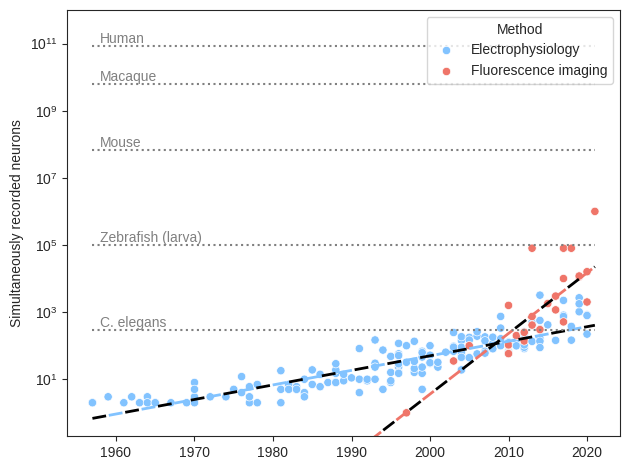

In [59]:
sns.scatterplot(
    neuro_df,
    x='Year',
    y='Neurons',
    hue='Method',
    palette=[COLOR_PALETTE['deepsky-blue'], COLOR_PALETTE['bittersweet']]
)
plt.plot(x_lin, y_lin_ephys, 'k', ls=(0, (5, 7)), lw=2)
plt.plot(x_lin, y_lin_imag, 'k', ls=(0, (5, 7)), lw=2)

plt.plot(x_lin, y_lin_ephys, COLOR_PALETTE['deepsky-blue'], ls=(6, (5, 7)), lw=2)
plt.plot(x_lin, y_lin_imag, COLOR_PALETTE['bittersweet'], ls=(6, (5, 7)), lw=2)
plt.yscale('log')

plot_species_neurons_hlines(min_year, max_year, 1958)
plt.ylabel('Simultaneously recorded neurons')
plt.xlabel(None)
plt.ylim(.2, 1e12)
plt.tight_layout()
plt.savefig('second-drafts/neuro-recordings.svg')
plt.savefig('fourth-drafts/previous/neuro-recordings.svg')
plt.savefig('fourth-drafts/previous/neuro-recordings.png')

# Figure 5: Brain initiatives

In [30]:
brain_proj_df = pd.read_csv(
    './data/initiatives/Overview of Brain Initiatives T4 v2.xlsx - Sheet1.csv',
    parse_dates=['Start Year (cleaned)', 'End Year (cleaned)']
)

# Drop rows with no start date or budget
brain_proj_df.dropna(subset=['Start Year (cleaned)', 'Budget (in million $) (cleaned)'], inplace=True)

# Don't care about academic / gov't / etc.
# Would rather compare to other large projects
brain_proj_df['Category'] = 'Brain'

# Set active project end date to 2024 if not specified
# active_inds = initiatives_df['Status'] == 'Active'
brain_proj_df['End Year (cleaned)'] = brain_proj_df['End Year (cleaned)'].fillna(dt.datetime(year=2024, month=12, day=31))
# TODO: Set inactive project end date to 1 year after start if not specified

brain_proj_df.sort_values('Budget (in million $) (cleaned)', inplace=True, ascending=False)

brain_proj_df.head()

,Project name,Category,Status,Start Year,Start Year (cleaned),End Year,End Year (cleaned),Budget (in million $),Budget (in million $) (cleaned),Ignore?,Funders,Model Organism Studied,Model Organism Studied (Simplified),References,blurb,Related Keywords/Papers
24,BRAIN Initiative 1.0,Brain,Concluded,2013,2013-01-01,2022,2022-01-01,6000,6000.0,NaN,"NIH, DARPA, NSF, HHMI (Howard Hughes Medical I...","Mice, Non-human Primates, Human","Rodents,Non-human Primates,Human",https://braininitiative.nih.gov/funding/unders...,Developed cutting-edge tools to map and unders...,https://braininitiative.nih.gov/vision/nih-bra...
25,BRAIN Initiative 2.0,Brain,Active,2022,2022-01-01,2032,2032-01-01,5000,5000.0,NaN,NIH and United States Congress.,"Mice, Non-human Primates, Human","Rodents,Non-human Primates,Human",https://braininitiative.nih.gov/funding/unders...,Builds on BRAIN 1.0 by focusing on translation...,https://braininitiative.nih.gov/vision/nih-bra...
12,The Chinese Human Brain Connectome Project,Brain,Active,2017,2017-01-01,major data \nreleased\n(2024),2024-12-31,"1,600",1600.0,NaN,Beijing Municipal Science & Technology Commiss...,Human,Human,https://www.nature.com/articles/s41592-023-017...,Maps the human brain connectome in Chinese \np...,https://pmc.ncbi.nlm.nih.gov/articles/PMC10388...
18,Human Brain Project,Brain,Concluded,2013,2013-01-01,2023,2023-01-01,1000,1000.0,NaN,European Commission and 113 other funders from...,"Rodents, Humans","Rodents,Human",https://www.humanbrainproject.eu/en/about-hbp/...,Integrates neuroscience data into computationa...,https://www.sciencedirect.com/science/article/...
9,Neuralink,Brain,Active,2016,2016-01-01,NaN,2024-12-31,total 5 rounds= 680,680.0,NaN,"Elon Musk, Founders Fund, Vy Capital, Google V...","Human, pigs","Human,Pig",https://pmc.ncbi.nlm.nih.gov/articles/PMC69142...,Develops brain-computer interfaces (BCIs) for ...,https://pmc.ncbi.nlm.nih.gov/articles/PMC69142...


In [31]:
other_proj_df = pd.read_csv(
    './data/initiatives/Digital Human Intelligence Figures - Costs of different projects.csv',
    parse_dates=['StartYear', 'EndYear'],
    converters={'Adjusted2024_M': lambda s: 1e3 * float(s.replace('$', ''))}
)

other_proj_df

,Name,Description,Category,Cost_M,Adjusted2024_M,CostPerYear_M,StartYear,EndYear,Years
0,F-35 Fighter Program,Joint Strike Fighter development,Defense,400000,500000.0,18182,2021-01-01,2023-01-01,22
1,Apollo Program,First human Moon landing program,Space,28400,283000.0,2582,1961-01-01,1972-01-01,11
2,International Space Station,Orbital space station construction,Space,150000,209000.0,11538,1998-01-01,2011-01-01,13
3,Kashagan Oil Field,Kazakhstan oil field development,Energy,116000,140000.0,7250,2000-01-01,2016-01-01,16
4,California High-Speed Rail,LA to SF high-speed rail project,Transport,105000,105000.0,4200,2008-01-01,2033-01-01,25
5,Chevron Gorgon Project,Australian LNG development,Energy,54000,62000.0,6750,2009-01-01,2017-01-01,8
6,Meta Reality Labs,Virtual and augmented reality development,Tech,60000,60000.0,6000,2014-01-01,2024-01-01,10
7,Boeing 787 Development,Dreamliner aircraft development,Transport,32000,42000.0,4000,2003-01-01,2011-01-01,8
8,Three Gorges Dam,World's largest hydroelectric dam,Infrastructure,32000,42000.0,1778,1994-01-01,2012-01-01,18
9,TSMC Arizona Fabs,Advanced semiconductor manufacturing,Tech,40000,40000.0,8000,2021-01-01,2026-01-01,5


In [32]:
pd.DataFrame.reindex

<function pandas.core.frame.DataFrame.reindex(self, labels=None, *, index=None, columns=None, axis: 'Axis | None' = None, method: 'ReindexMethod | None' = None, copy: 'bool | None' = None, level: 'Level | None' = None, fill_value: 'Scalar | None' = nan, limit: 'int | None' = None, tolerance=None) -> 'DataFrame'>

In [33]:
all_proj_df = pd.concat([
    other_proj_df[['Name', 'Adjusted2024_M', 'Category', 'StartYear', 'EndYear']].rename(columns={
        'Adjusted2024_M': 'Budget_M',
    }),
    brain_proj_df[['Project name', 'Category', 'Budget (in million $) (cleaned)', 'Start Year (cleaned)', 'End Year (cleaned)']].rename(columns={
        'Project name': 'Name', 
        'Budget (in million $) (cleaned)': 'Budget_M', 
        'Start Year (cleaned)': 'StartYear',
        'End Year (cleaned)': 'EndYear',
    }),
], ignore_index=True)

all_proj_df

,Name,Budget_M,Category,StartYear,EndYear
0,F-35 Fighter Program,500000.00,Defense,2021-01-01,2023-01-01
1,Apollo Program,283000.00,Space,1961-01-01,1972-01-01
2,International Space Station,209000.00,Space,1998-01-01,2011-01-01
3,Kashagan Oil Field,140000.00,Energy,2000-01-01,2016-01-01
4,California High-Speed Rail,105000.00,Transport,2008-01-01,2033-01-01
5,Chevron Gorgon Project,62000.00,Energy,2009-01-01,2017-01-01
6,Meta Reality Labs,60000.00,Tech,2014-01-01,2024-01-01
7,Boeing 787 Development,42000.00,Transport,2003-01-01,2011-01-01
8,Three Gorges Dam,42000.00,Infrastructure,1994-01-01,2012-01-01
9,TSMC Arizona Fabs,40000.00,Tech,2021-01-01,2026-01-01


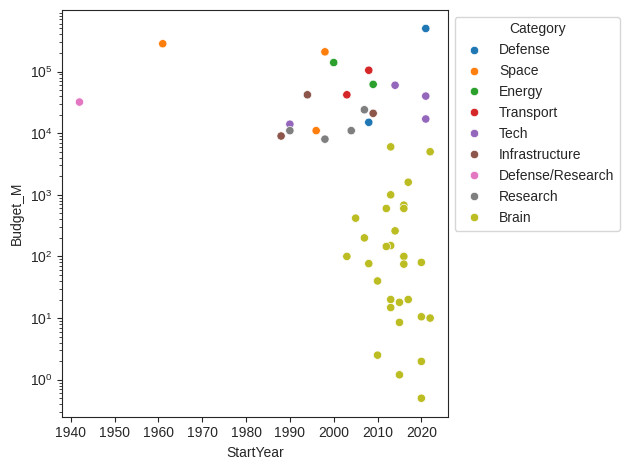

In [34]:
ax = sns.scatterplot(
    all_proj_df,
    x='StartYear',
    y='Budget_M',
    hue='Category',
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.yscale('log')
plt.tight_layout()
plt.savefig('second-drafts/initiatives1.svg')

In [35]:
proj_durations = all_proj_df['EndYear'] - all_proj_df['StartYear']
proj_midpoints = all_proj_df['StartYear'] + proj_durations / 2

In [36]:
all_proj_df['Category'].unique()

array(['Defense', 'Space', 'Energy', 'Transport', 'Tech',
       'Infrastructure', 'Defense/Research', 'Research', 'Brain'],
      dtype=object)

In [37]:
list(enumerate(all_proj_df['Category'].unique()))

[(0, 'Defense'),
 (1, 'Space'),
 (2, 'Energy'),
 (3, 'Transport'),
 (4, 'Tech'),
 (5, 'Infrastructure'),
 (6, 'Defense/Research'),
 (7, 'Research'),
 (8, 'Brain')]

In [38]:
proj_categories = all_proj_df['Category'].unique()
category_colors = [f'C{i}' for i in range(len(proj_categories))]

category_colormap = dict(zip(proj_categories, category_colors))
category_colormap

{'Defense': 'C0',
 'Space': 'C1',
 'Energy': 'C2',
 'Transport': 'C3',
 'Tech': 'C4',
 'Infrastructure': 'C5',
 'Defense/Research': 'C6',
 'Research': 'C7',
 'Brain': 'C8'}

In [39]:
proj_colors = list(map(lambda cat: category_colormap[cat], all_proj_df['Category']))

In [40]:
from matplotlib.patches import Patch

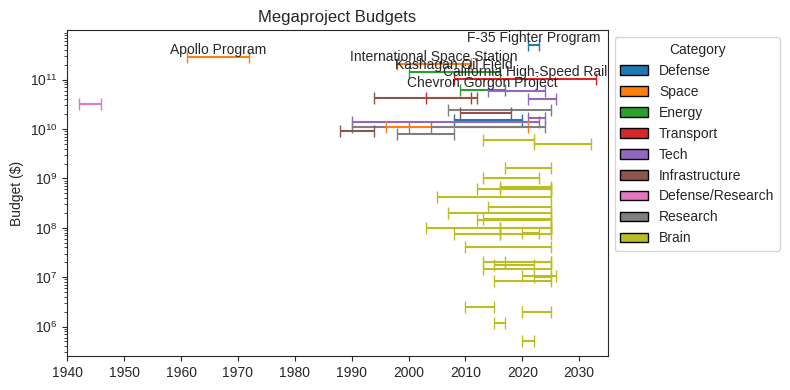

In [41]:
fig = plt.figure(figsize=(8,4))
for i in range(len(all_proj_df)):
    plt.errorbar(
        [proj_midpoints[i]],
        [1e6 * all_proj_df.loc[i, 'Budget_M']],
        ls='none',
        xerr=[proj_durations[i] / 2],
        capsize=4,
        ecolor=proj_colors[i],
    )
plt.yscale('log')
plt.xlim(dt.datetime(year=1940, month=1, day=1), dt.datetime(year=2035, month=1, day=1))
# plt.xlim(dt.datetime(year=1980, month=1, day=1), dt.datetime(year=2035, month=1, day=1))
plt.ylabel('Budget ($)')

legend_handles = [
    Patch(
        facecolor=color,
        edgecolor='black',
        label=category
    ) 
    for category, color 
    in zip(proj_categories, category_colors)
]

for i, proj in all_proj_df.head(6).iterrows():
    plt.text(
        proj_midpoints[i],
        1e6 * proj['Budget_M'],
        proj['Name'],
        ha='center',
        va='bottom',
    )

plt.legend(handles=legend_handles, title="Category", loc='upper left', bbox_to_anchor=(1,1))
plt.title('Megaproject Budgets')
plt.tight_layout()
plt.savefig('second-drafts/initiatives2.svg')
plt.show()

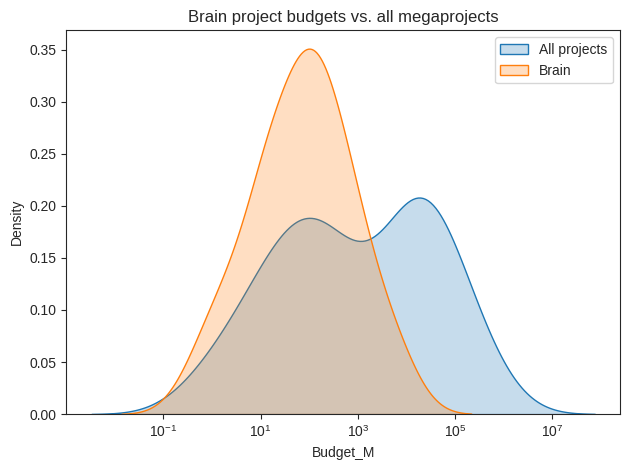

In [42]:
ax, fig = plt.subplots()
sns.kdeplot(all_proj_df, x='Budget_M', label='All projects', fill=True, log_scale=True)
sns.kdeplot(all_proj_df.query('Category == "Brain"'), x='Budget_M', label='Brain', fill=True, log_scale=True)
# sns.histplot(all_proj_df, x='Budget_M', hue='Category')
plt.title('Brain project budgets vs. all megaprojects')
plt.legend()
plt.tight_layout()
plt.savefig('second-drafts/initiatives3.svg')

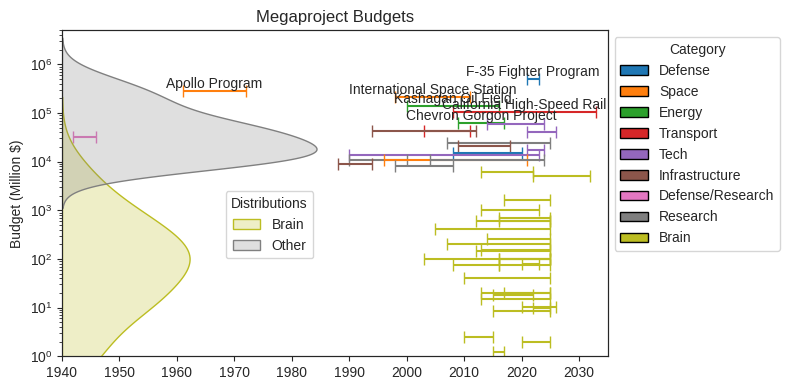

In [43]:
fig = plt.figure(figsize=(8,4))
ax = fig.subplots()
for i in range(len(all_proj_df)):
    plt.errorbar(
        [proj_midpoints[i]],
        [all_proj_df.loc[i, 'Budget_M']],
        ls='none',
        xerr=[proj_durations[i] / 2],
        capsize=4,
        ecolor=proj_colors[i],
    )
plt.yscale('log')
plt.xlim(dt.datetime(year=1940, month=1, day=1), dt.datetime(year=2035, month=1, day=1))
# plt.xlim(dt.datetime(year=1980, month=1, day=1), dt.datetime(year=2035, month=1, day=1))
plt.ylabel('Budget (Million $)')

legend_handles = [
    Patch(
        facecolor=color,
        edgecolor='black',
        label=category
    ) 
    for category, color 
    in zip(proj_categories, category_colors)
]

for i, proj in all_proj_df.head(6).iterrows():
    plt.text(
        proj_midpoints[i],
        proj['Budget_M'],
        proj['Name'],
        ha='center',
        va='bottom',
    )

plt.legend(handles=legend_handles, title="Category", loc='upper left', bbox_to_anchor=(1,1))
plt.title('Megaproject Budgets')

ax2 = plt.twiny()
ax2.set_xticks([])
ax2.set_xlim(0, 1.5)

# sns.kdeplot(all_proj_df, y='Budget_M', label='All projects', fill=True, log_scale=True, ax=ax2)
sns.kdeplot(all_proj_df.query('Category == "Brain"'), y='Budget_M', label='Brain', color='C8', fill=True, log_scale=True, ax=ax2)
sns.kdeplot(all_proj_df.query('Category != "Brain"'), y='Budget_M', label='Other', color='gray', fill=True, log_scale=True, ax=ax2)
# sns.histplot(all_proj_df, x='Budget_M', hue='Category')
# plt.title('Brain project budgets vs. all megaprojects')
plt.legend(loc=(0.3, 0.3), title='Distributions')

plt.ylim(1e0, 5e6)

plt.tight_layout()
plt.savefig('second-drafts/initiatives4.svg')
plt.show()

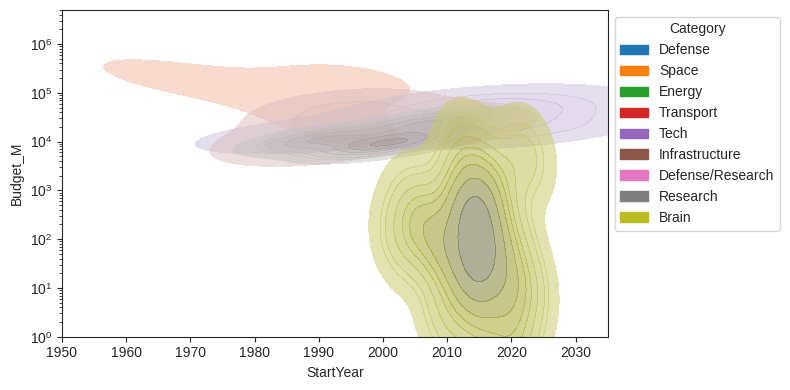

In [44]:
fig = plt.figure(figsize=(8,4))
ax = fig.subplots()

sns.kdeplot(
    all_proj_df,
    x='StartYear',
    y='Budget_M',
    hue='Category',
    log_scale=(False, True),
    fill=True,
    alpha=0.5,
    warn_singular=False,
    
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(1e0, 5e6)
plt.xlim(dt.datetime(year=1950, month=1, day=1), dt.datetime(year=2035, month=1, day=1))
plt.tight_layout()
plt.savefig('second-drafts/initiatives5.svg')

/tmp/ipykernel_723821/2541207274.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(all_proj_df.query(f'Category == "{category}"'), x='Budget_M', label=category, fill=False, log_scale=True)


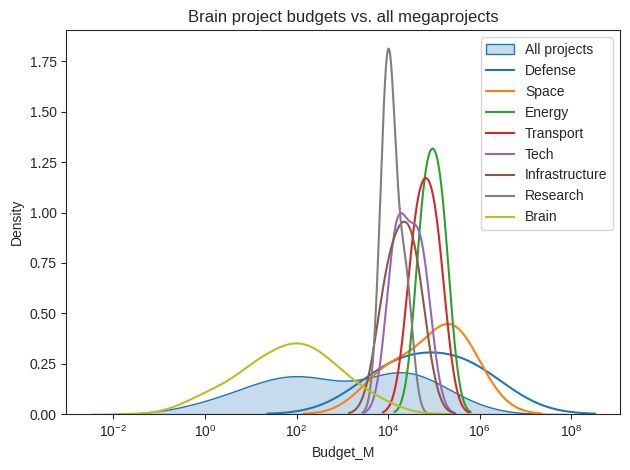

In [45]:
# ax, fig = plt.subplots()
# plt.xscale('log')
sns.kdeplot(all_proj_df, x='Budget_M', label='All projects', log_scale=True, fill=True)
for category in proj_categories:
    sns.kdeplot(all_proj_df.query(f'Category == "{category}"'), x='Budget_M', label=category, fill=False, log_scale=True)
# sns.histplot(all_proj_df, x='Budget_M', hue='Category')
plt.title('Brain project budgets vs. all megaprojects')
plt.legend()
plt.tight_layout()
plt.savefig('second-drafts/initiatives6.svg')

# Figure 6: Brain scans

In [46]:
scans_df = pd.read_csv(
    './data/brain-scans/Copy of (best) Upwork_TASK 1 (2) - Sheet1.csv',
    parse_dates=['Year'],
)

scans_df.head()

,First Author,Year,Organism,Organism (cleaned),Dataset name,Volume(as quoted),Volume (μm³),Volume (claude),Resolution (nm),Resolution (claude),Dataset Size (TB),Dataset Size (Claude),Acquisition Time (days),Scanning Costs ($),Method,Method (claude),Completion %,References,Notes
0,Antonio Jimenez-Marin,2024-01-01,Human,Human,LEMON,NaN,NaN,NaN,NaN,NaN,"n/a (given 40,000 healthy individuals)",NaN,not given,not given,"fMRI, diffusion MRI",Tractography,not given,https://www.nature.com/articles/s41597-024-030...,NaN
1,Zing,2024-01-01,Mouse,Mouse,ALCEM,1 mm³,1x10⁹,1.000000e+09,4 x 4 x 40,8000.0,"2,500",2.5,200,"6,000,000",ATUM-SEM,Electron Microscopy,100%,https://pmc.ncbi.nlm.nih.gov/articles/PMC10054...,"Using the MICrONS dataset, this study reveals ..."
2,Nanfang Pan,2024-01-01,Human (College students),Human,Behavioral and neuroimaging data collected pre...,NaN,NaN,NaN,Spatial: 3.0 Tesla fMRI with \n~2 mm³ voxel si...,2.0,not mentioned,NaN,Neuroimaging data collected over multiple sess...,not given,"Resting-state functional MRI (rs-fMRI), Regula...",Neuronal Circuit Mapping,100%,https://www.nature.com/articles/s41398-024-027...,The study highlights functional connectivity p...
3,Qiang Ma,2024-01-01,Human (Neonates),Human,Developing Human Connectome Project (dHCP),Not explicitly quoted; \ndataset contains 879 ...,Not explicitly calculated; \ndataset includes ...,NaN,"500,000nm3",500000.0,2-3 TB per cohort for neuroimaging data,2.5,DL-based pipeline ~24 seconds per scan; \norig...,not specified\n(mentions high cost),Deep Learning-based cortical surface reconstru...,Neuronal Circuit Mapping,90%,https://arxiv.org/pdf/2405.08783v2,The study introduced a GPU-accelerated pipelin...
4,Beets Isabel,2023-01-01,Caenorhabditis elegans,C. elegans,Peptide-GPCR Interaction Dataset,not given,not applicable,NaN,not applicable,NaN,"not given( includes sample size 55,384 peptide...",NaN,not given,not given,"Reverse pharmacology, calcium mobilization assays",Cellular Imaging,87%,https://doi.org/10.1016/j.celrep.2023.113058,Identified 461 peptide-GPCR pairs using a comp...


In [47]:
scans_df.dtypes

First Author                       object
Year                       datetime64[ns]
Organism                           object
Organism (cleaned)                 object
Dataset name                       object
Volume(as quoted)                  object
Volume (μm³)                       object
Volume (claude)                   float64
Resolution (nm)                    object
Resolution (claude)               float64
Dataset Size (TB)                  object
Dataset Size (Claude)             float64
Acquisition Time (days)            object
Scanning Costs ($)                 object
Method                             object
Method (claude)                    object
Completion %                       object
References                         object
Notes                              object
dtype: object

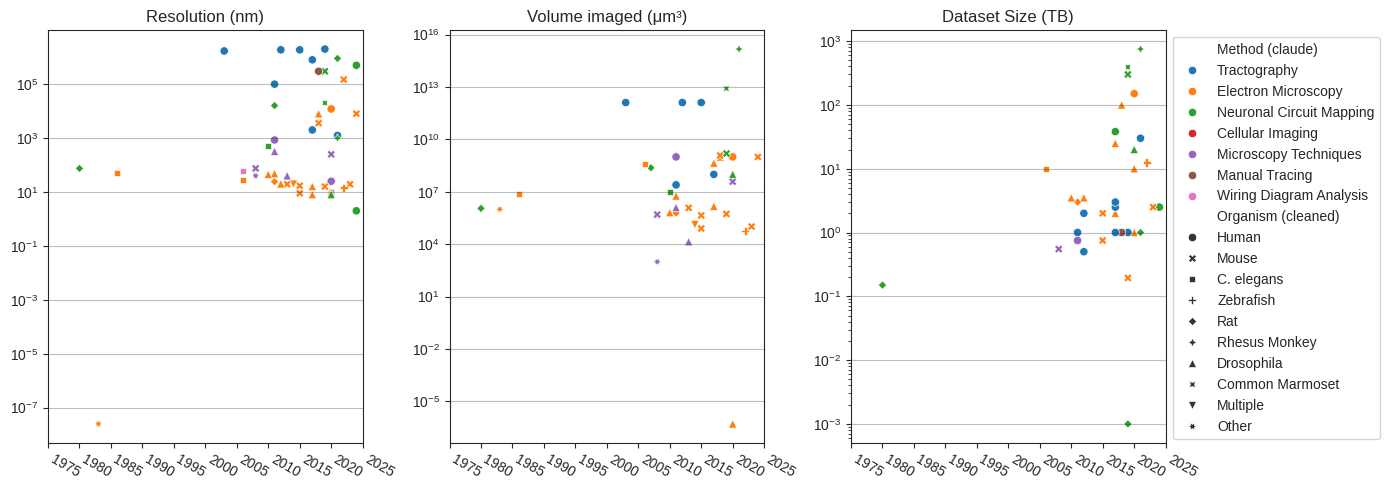

In [48]:
min_date = dt.date(year=1975, month=1, day=1)
max_date = dt.date(year=2025, month=1, day=1)

fig, axes = plt.subplots(1, 3, figsize=(14, 5))

xrot = -30
xha = 'left' if xrot < 0 else 'right'

# Subplot 1: resolution
sns.scatterplot(
    data=scans_df, 
    x='Year', 
    y='Resolution (claude)',
    hue='Method (claude)',
    style='Organism (cleaned)',
    ax=axes[0],
    legend=False,
)
axes[0].set_yscale('log')
axes[0].set_title('Resolution (nm)')
axes[0].set_xlim(min_date, max_date)
axes[0].set_xlabel(None)
axes[0].set_ylabel(None)
axes[0].grid(axis='y')
plt.sca(axes[0])
plt.xticks(rotation=xrot, ha=xha)

# Subplot 2: volume
sns.scatterplot(
    data=scans_df, 
    x='Year', 
    y='Volume (claude)',
    hue='Method (claude)',
    style='Organism (cleaned)',
    ax=axes[1],
    legend=False,
)
axes[1].set_yscale('log')
axes[1].set_title('Volume imaged (μm³)')
axes[1].set_xlim(min_date, max_date)
axes[1].set_xlabel(None)
axes[1].set_ylabel(None)
axes[1].grid(axis='y')
plt.sca(axes[1])
plt.xticks(rotation=xrot, ha=xha)

# Subplot 3: dataset size
sns.scatterplot(
    data=scans_df, 
    x='Year', 
    y='Dataset Size (Claude)',
    hue='Method (claude)',
    style='Organism (cleaned)',
    ax=axes[2],
    legend=True,
)
axes[2].set_yscale('log')
axes[2].set_title('Dataset Size (TB)')
sns.move_legend(axes[2], "upper left", bbox_to_anchor=(1, 1))
axes[2].set_xlim(min_date, max_date)
axes[2].set_xlabel(None)
axes[2].set_ylabel(None)
axes[2].grid(axis='y')
plt.sca(axes[2])
plt.xticks(rotation=xrot, ha=xha)

plt.tight_layout()
plt.savefig('second-drafts/scanned-brain-tissue.svg')
plt.savefig('fourth-drafts/previous/scanned-brain-tissue.svg')